In [47]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import ImageFile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [48]:
#to avoid corrupted files/images
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [49]:
#setting paths to train and test
train_dir = '/kaggle/input/yoga-poses-dataset/DATASET/TRAIN'
test_dir = '/kaggle/input/yoga-poses-dataset/DATASET/TEST'

In [50]:
#setup the data generator to expand the train dataset
train_datagen = ImageDataGenerator(
                    width_shift_range=0.1,
                    horizontal_flip=True,
                    rescale=1./255, 
                    validation_split=0.2
                )

test_datagen = ImageDataGenerator(
                    rescale=1./255,  
                    validation_split=0.2
                )

In [51]:
#applying data generator
train_generator = train_datagen.flow_from_directory(
                        directory=train_dir, 
                        target_size=(224,224), 
                        color_mode='rgb', 
                        class_mode='categorical',
                        batch_size=16, 
                        subset='training'
                    )

validation_generator = test_datagen.flow_from_directory(
                        directory=train_dir, 
                        target_size=(224,224),
                        color_mode='rgb', 
                        class_mode='categorical',
                        batch_size=16,
                        subset='validation'
                    )

Found 866 images belonging to 5 classes.
Found 215 images belonging to 5 classes.


In [52]:
#configuring TensorFlow to use the first available GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [53]:
#building the model (vgg19)
model = Sequential()
model.add(VGG19(include_top=False, weights='imagenet', input_shape=(224,224,3)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

In [54]:
#compiling model
optimizer = Adam(learning_rate=0.00001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)
epochs=10
batch_size=16

In [55]:
#training model
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator, batch_size=batch_size, callbacks=[reduce_lr])

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 33s 395ms/step - accuracy: 0.1795 - loss: 2.1604 - val_accuracy: 0.4233 - val_loss: 1.4881 - learning_rate: 1.0000e-05
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 20s 325ms/step - accuracy: 0.2714 - loss: 1.6806 - val_accuracy: 0.5256 - val_loss: 1.2780 - learning_rate: 1.0000e-05
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 20s 313ms/step - accuracy: 0.4124 - loss: 1.4455 - val_accuracy: 0.7070 - val_loss: 0.9583 - learning_rate: 1.0000e-05
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 312ms/step - accuracy: 0.5091 - loss: 1.2006 - val_accuracy: 0.8605 - val_loss: 0.6625 - learning_rate: 1.0000e-05
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 20s 317ms/step - accuracy: 0.6223 - loss: 1.0191 - val_accuracy: 0.8512 - val_loss: 0.4998 - learning_rate: 1.0000e-05
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 20s 320ms/step - accuracy: 0.7092 - loss: 0.7471 - val_accuracy: 0.9163 - val_loss: 0.4235 - learning_rate: 1.0000e-05
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 20s 329ms/step - acc

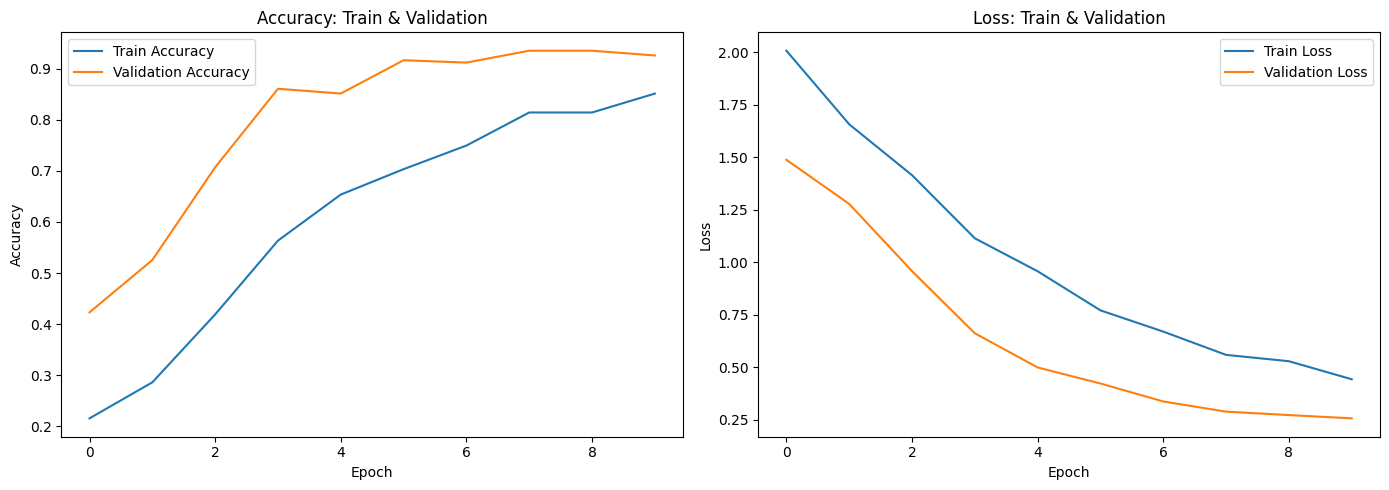

In [56]:
#plotting model accuray and loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

#accuracy plot
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Accuracy: Train & Validation')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

#loss plot
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Loss: Train & Validation')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

In [57]:
#evaluating model
train_loss, train_accuracy = model.evaluate(train_generator)
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}')

55/55 ━━━━━━━━━━━━━━━━━━━━ 17s 308ms/step - accuracy: 0.9356 - loss: 0.2485
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.9186 - loss: 0.2889
Train Accuracy: 0.9330, Validation Accuracy: 0.9256


In [58]:
model.save('YogaPoseModel.h5')